In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the excel files
#load the sheets into dataframes
df = pd.read_excel('TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx')
existing_employees = pd.read_excel('TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx',"Existing employees")
employees_left= pd.read_excel('TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx',"Employees who have left")

In [3]:
print(existing_employees.head())
print(employees_left.head())

   Emp ID  satisfaction_level  last_evaluation  number_project  \
0    2001                0.58             0.74               4   
1    2002                0.82             0.67               2   
2    2003                0.45             0.69               5   
3    2004                0.78             0.82               5   
4    2005                0.49             0.60               3   

   average_montly_hours  time_spend_company  Work_accident  \
0                   215                   3              0   
1                   202                   3              0   
2                   193                   3              0   
3                   247                   3              0   
4                   214                   2              0   

   promotion_last_5years   dept salary  
0                      0  sales    low  
1                      0  sales    low  
2                      0  sales    low  
3                      0  sales    low  
4                      0 

In [4]:
print(existing_employees.describe())
print(employees_left.describe())

             Emp ID  satisfaction_level  last_evaluation  number_project  \
count  11428.000000        11428.000000     11428.000000    11428.000000   
mean    7812.340742            0.666810         0.715473        3.786664   
std     3453.947461            0.217104         0.162005        0.979884   
min     2001.000000            0.120000         0.360000        2.000000   
25%     4857.750000            0.540000         0.580000        3.000000   
50%     7714.500000            0.690000         0.710000        4.000000   
75%    10571.250000            0.840000         0.850000        4.000000   
max    14211.000000            1.000000         1.000000        6.000000   

       average_montly_hours  time_spend_company  Work_accident  \
count          11428.000000        11428.000000   11428.000000   
mean             199.060203            3.380032       0.175009   
std               45.682731            1.562348       0.379991   
min               96.000000            2.000000    

In [6]:
print(existing_employees.isnull().sum())
print(employees_left.isnull().sum())

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64
Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64


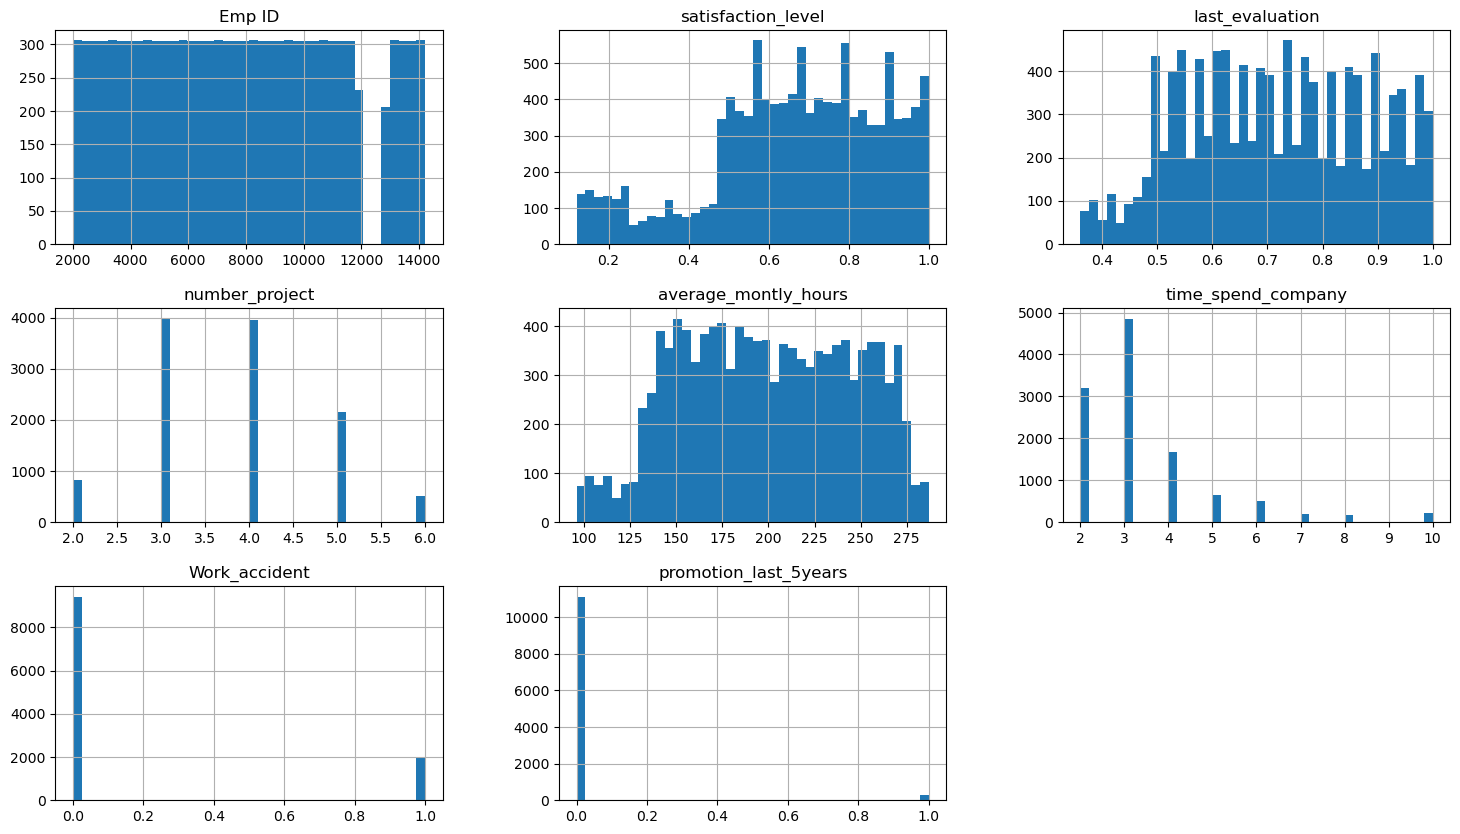

In [5]:
existing_employees.hist(bins=40,figsize=(18,10))
plt.show()

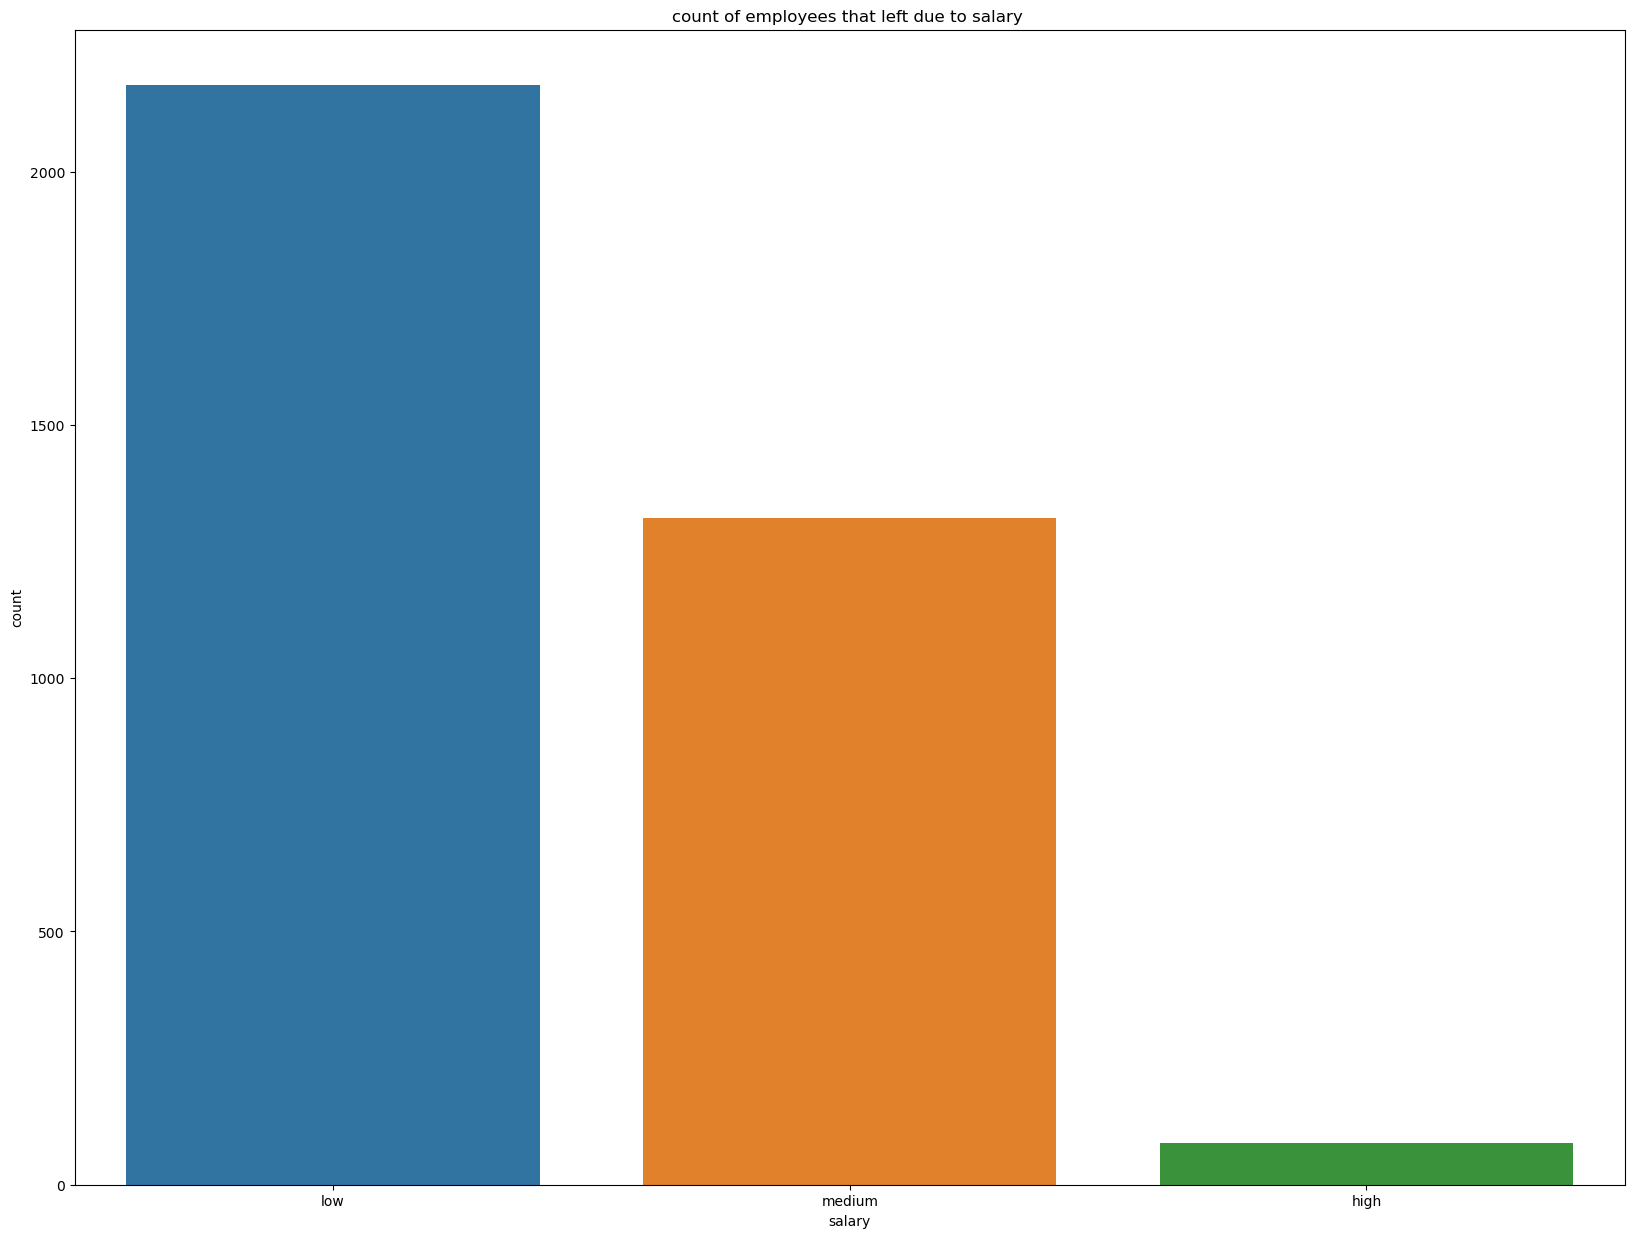

In [42]:
#count by employees that left by salary range
plt.figure(figsize=(20,15))
sns.countplot(x='salary',data = employees_left)
plt.title('count of employees that left due to salary ')
plt.show()




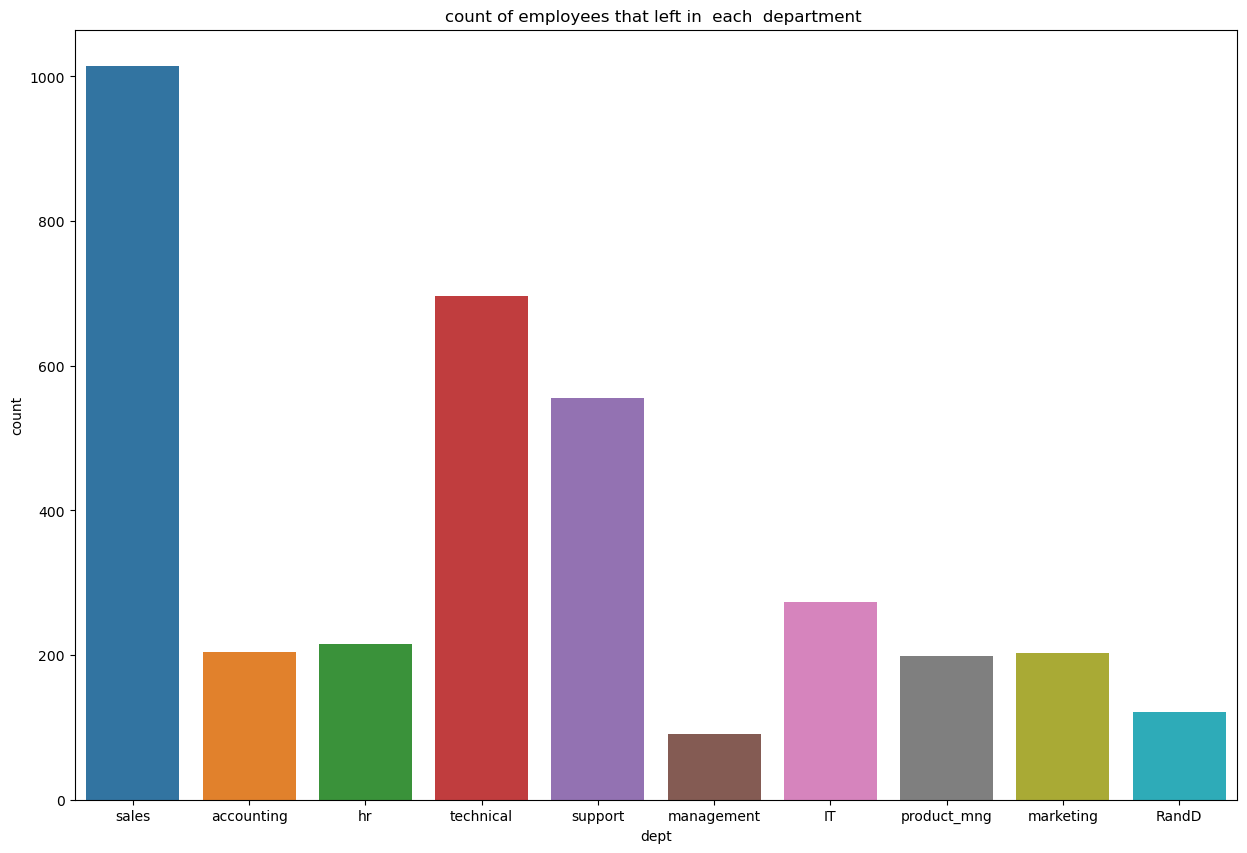

In [43]:
#count by employees that left by department
plt.figure(figsize=(15,10))
sns.countplot(x='dept',data = employees_left)
plt.title('count of employees that left in  each  department ')
plt.show()

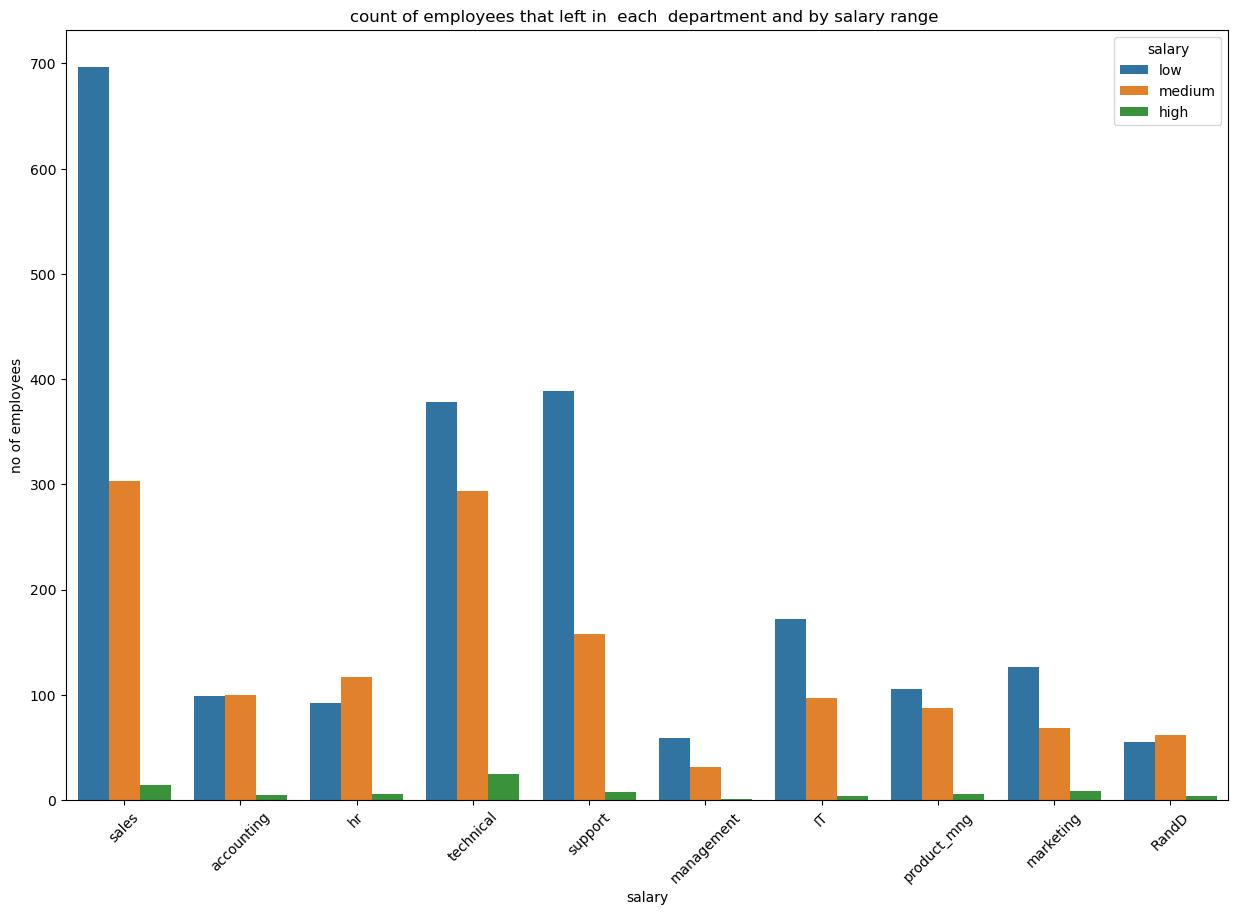

In [17]:
#count by employees that left by department and salary
plt.figure(figsize=(15,10))
sns.countplot(x='dept',hue ='salary',data = employees_left)
plt.title('count of employees that left in  each  department and by salary range ')
plt.xlabel('dept' and 'salary')
plt.ylabel('no of employees')
plt.xticks(rotation=45)
plt.show()

for the first objective...
based on the analysis performed and the outcomes from the plots done on the 'employee who have left' data,checking the salary and department column,It is shown in the charts that people in the sales department left more,and also people with low salary.
In the charts that contains both the salary and department,it is shown that employees with very low salary left more in each department,
employees with medium salary left more in hr department and the RandD dept,
equal number of employees with medium and low salary left in the accounting department

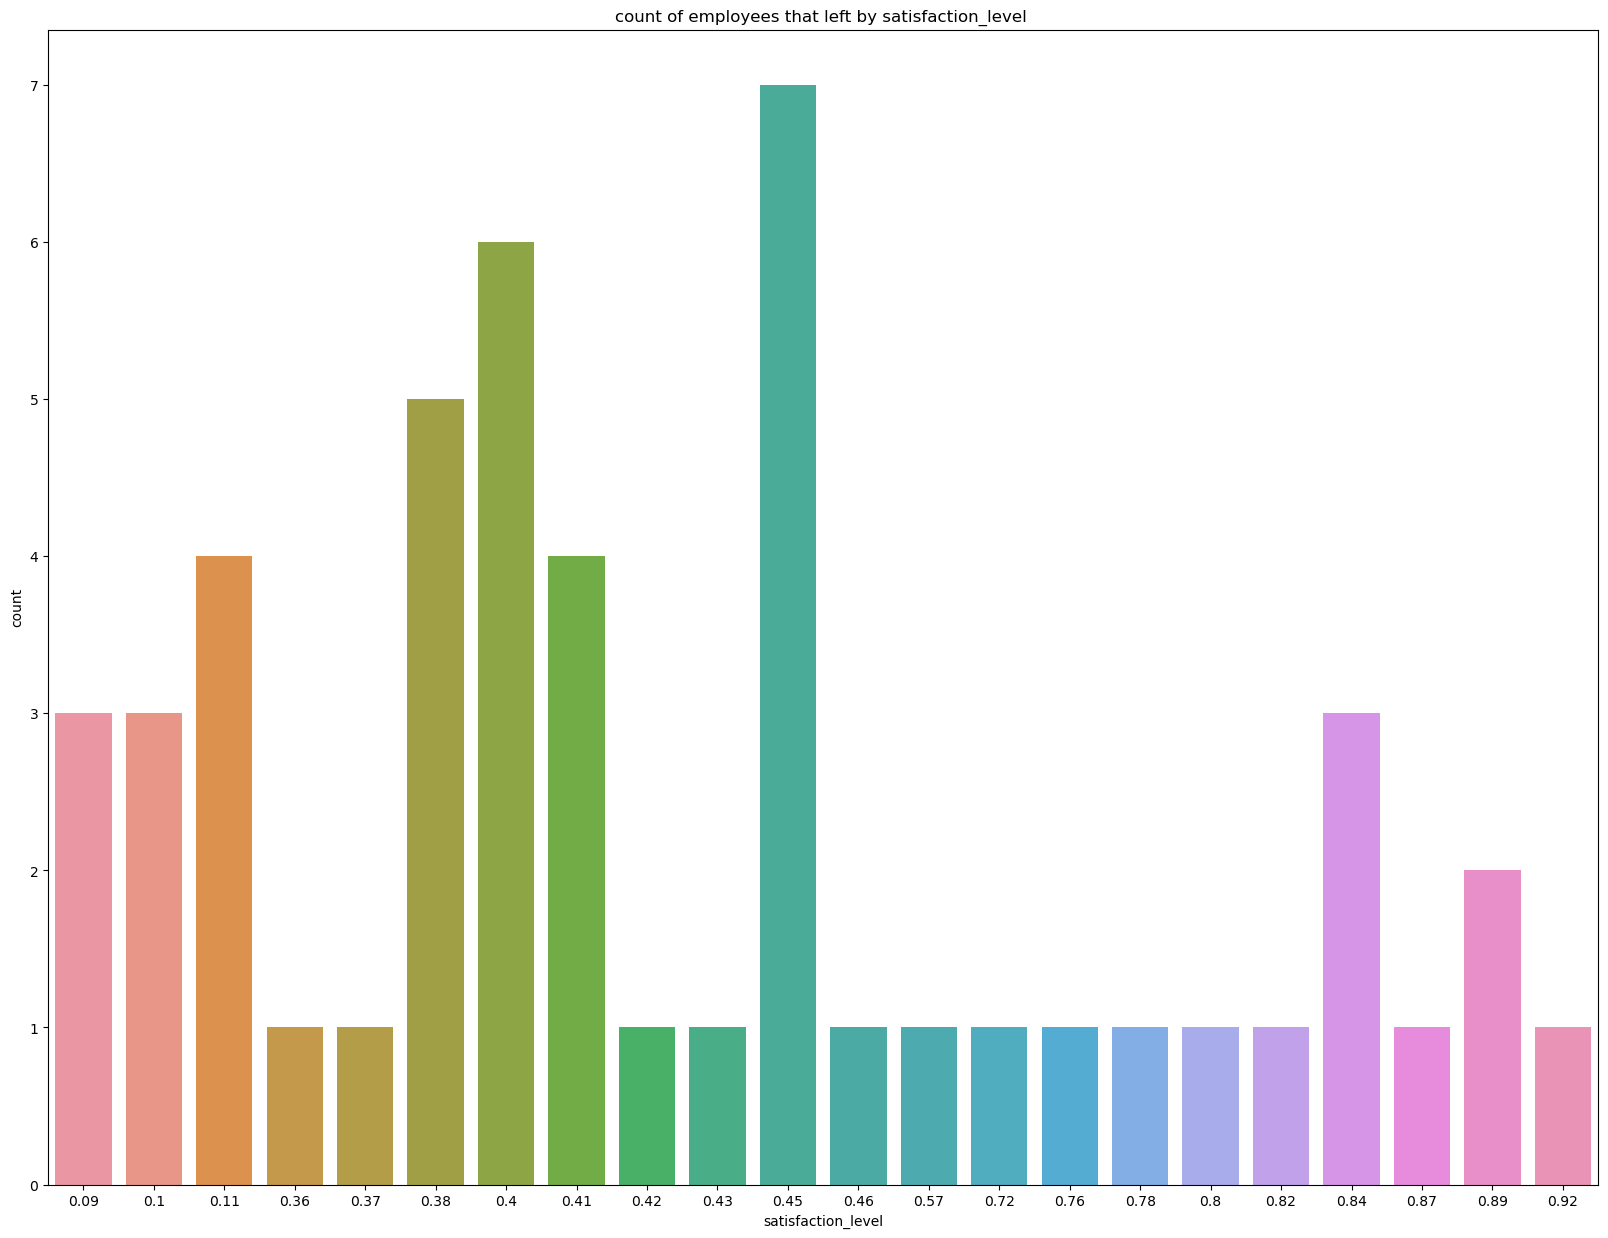

In [19]:
#count by employees that left by satisfaction_level
plt.figure(figsize=(20,15))
sns.countplot(x='satisfaction_level',data = employees_left.head(50))
plt.title('count of employees that left by satisfaction_level ')
plt.show()

the above charts also shows that more employees who left have satisfaction level less than 50%..

In [26]:
# Combine the two dataframes
all_employees = pd.concat([existing_employees.assign(left=0), employees_left.assign(left=1)])

# Convert categorical variables into dummy variables
all_employees = pd.get_dummies(all_employees, columns=['dept', 'salary'])

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into a training set and a test set
X = all_employees.drop(columns=['Emp ID', 'left'])
y = all_employees['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Check feature importance
importance = model.coef_[0]
for i, j in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (X.columns[i], j))

Feature: satisfaction_level, Score: -4.13722
Feature: last_evaluation, Score: 0.80780
Feature: number_project, Score: -0.32160
Feature: average_montly_hours, Score: 0.00448
Feature: time_spend_company, Score: 0.25956
Feature: Work_accident, Score: -1.54009
Feature: promotion_last_5years, Score: -1.07810
Feature: dept_IT, Score: -0.18780
Feature: dept_RandD, Score: -0.47006
Feature: dept_accounting, Score: 0.10850
Feature: dept_hr, Score: 0.35706
Feature: dept_management, Score: -0.40736
Feature: dept_marketing, Score: 0.02360
Feature: dept_product_mng, Score: -0.03143
Feature: dept_sales, Score: 0.03613
Feature: dept_support, Score: 0.11148
Feature: dept_technical, Score: 0.16783
Feature: salary_high, Score: -1.19991
Feature: salary_low, Score: 0.70890
Feature: salary_medium, Score: 0.19896


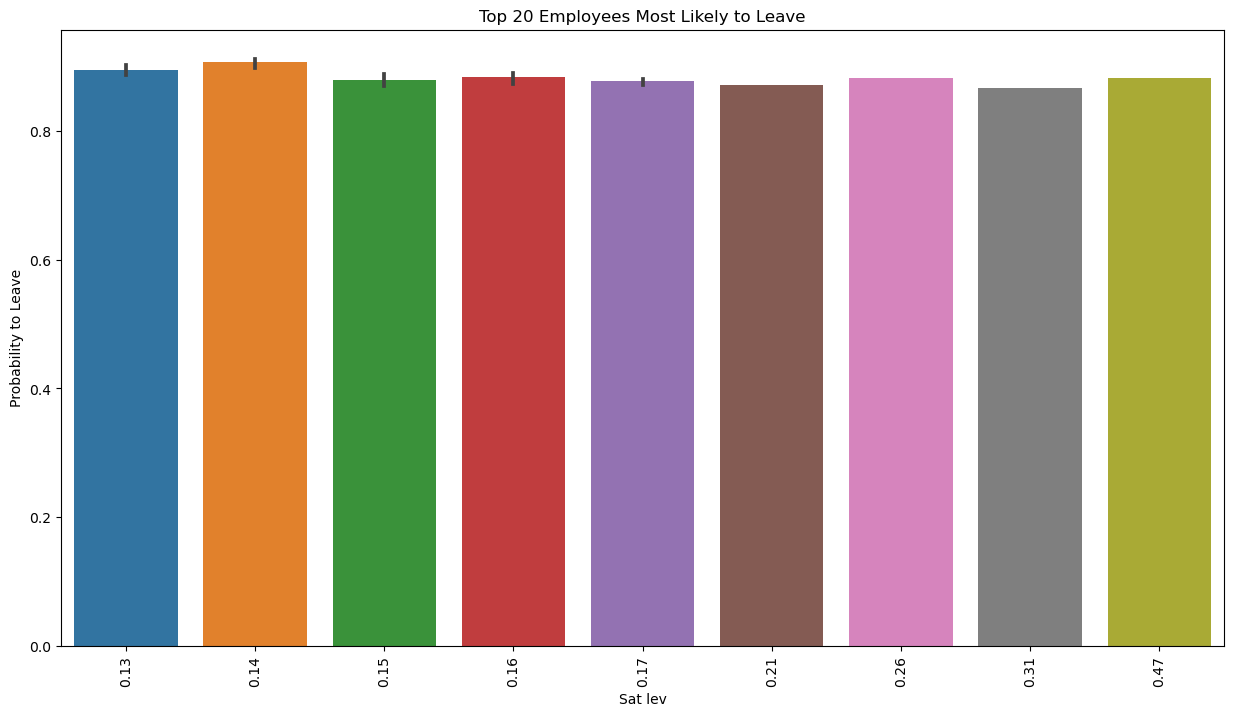

In [39]:
# Predict the probability of each employee leaving
all_employees['probability_to_leave'] = model.predict_proba(X)[:, 1]

# Create a DataFrame of the employees most likely to leave
likely_to_leave = all_employees[all_employees['left'] == 0]  # consider only existing employees
likely_to_leave = likely_to_leave.sort_values('probability_to_leave', ascending=False)

# Plot the top 20 employees most likely to leave
plt.figure(figsize=(15, 8))
sns.barplot(x='satisfaction_level', y='probability_to_leave', data=likely_to_leave.head(20))
plt.xlabel('Sat lev')
plt.ylabel('Probability to Leave')
plt.title('Top 20 Employees Most Likely to Leave')
plt.xticks(rotation=90)
plt.show()


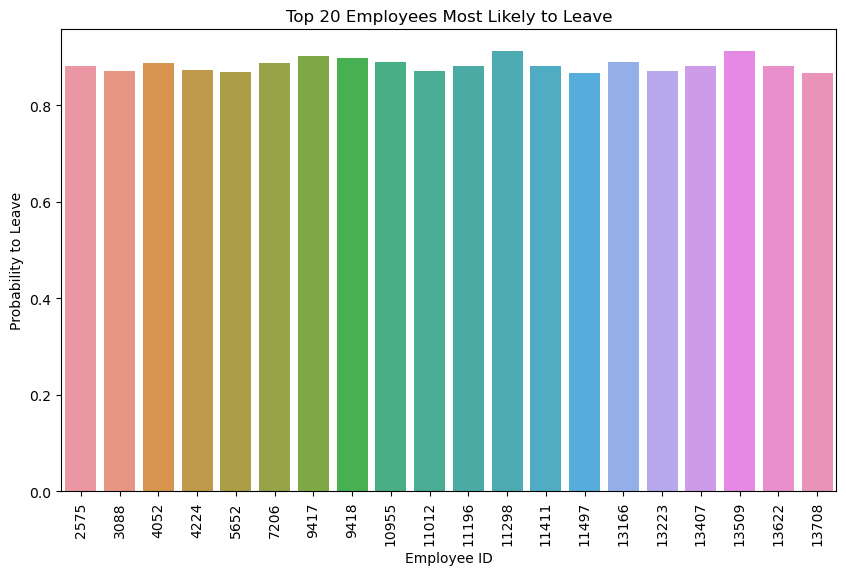

In [28]:
# Predict the probability of each employee leaving
all_employees['probability_to_leave'] = model.predict_proba(X)[:, 1]

# Create a DataFrame of the employees most likely to leave
likely_to_leave = all_employees[all_employees['left'] == 0]  # consider only existing employees
likely_to_leave = likely_to_leave.sort_values('probability_to_leave', ascending=False)

# Plot the top 20 employees most likely to leave
plt.figure(figsize=(10, 6))
sns.barplot(x='Emp ID', y='probability_to_leave', data=likely_to_leave.head(20))
plt.xlabel('Employee ID')
plt.ylabel('Probability to Leave')
plt.title('Top 20 Employees Most Likely to Leave')
plt.xticks(rotation=90)
plt.show()


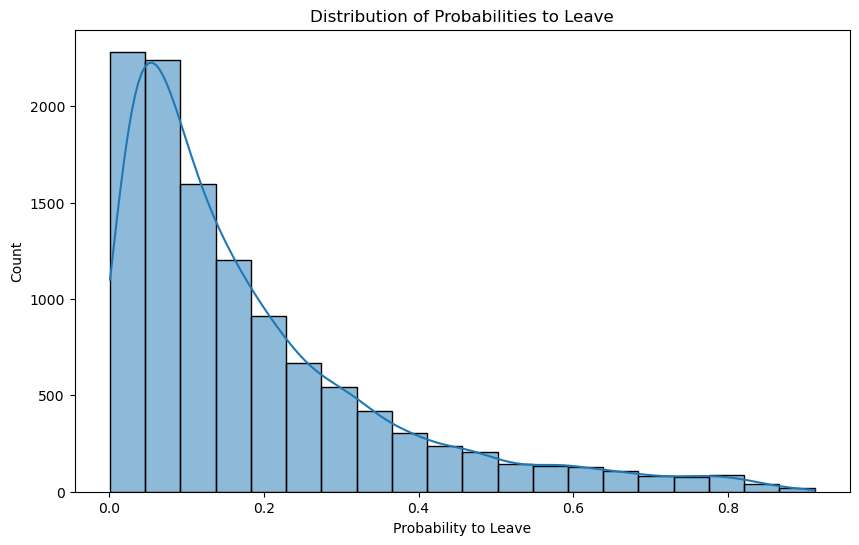

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=likely_to_leave, x='probability_to_leave', bins=20, kde=True)
plt.xlabel('Probability to Leave')
plt.title('Distribution of Probabilities to Leave')
plt.show()

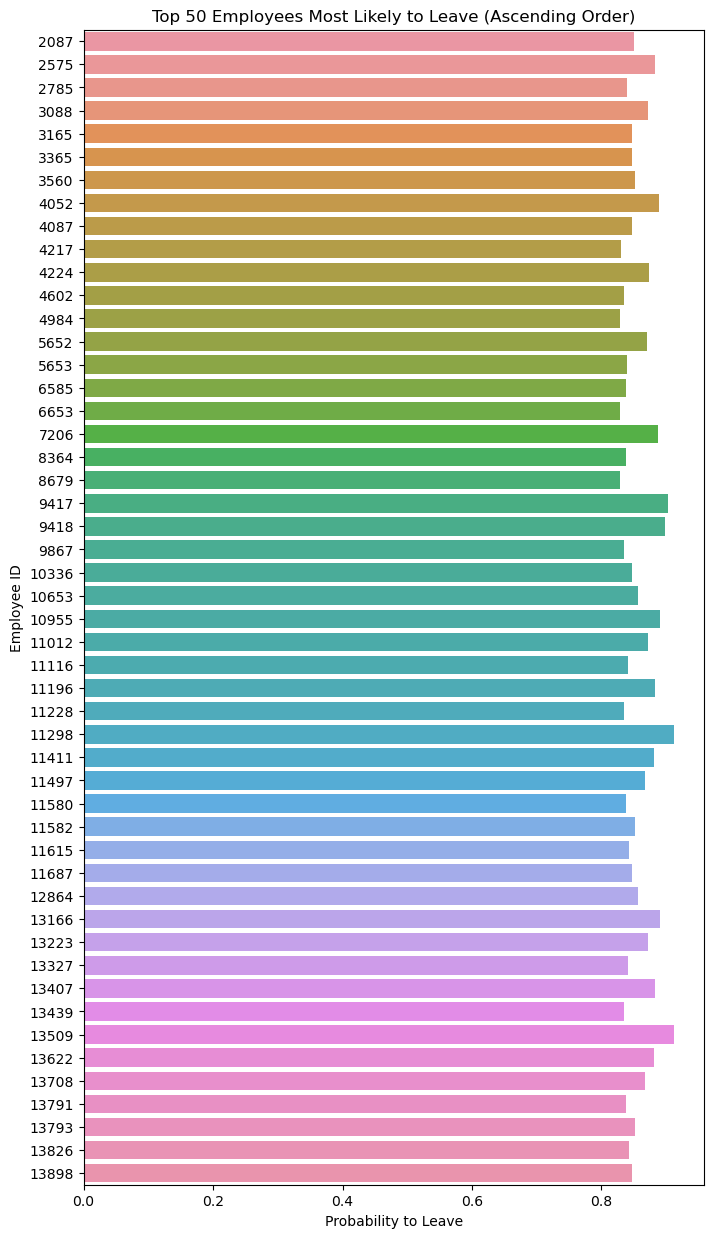

In [29]:
plt.figure(figsize=(8, 15))
sns.barplot(x='probability_to_leave', y='Emp ID', data=likely_to_leave.head(50), orient='h')
plt.ylabel('Employee ID')
plt.xlabel('Probability to Leave')
plt.title('Top 50 Employees Most Likely to Leave (Ascending Order)')
plt.show()

For the objective(2):
    
    It is seen in line 39..it is shown there that employees with low satisfaction level are likely to leave

Also,
Findings shows that:
Satisfaction Level: The satisfaction level of employees is found to have a significant impact on employee attrition. Lower satisfaction levels are associated with a higher likelihood of leaving.

Promotion: Employees without any promotion in the last five years are more likely to leave the organization.

Department: A higher attrition rate is observed in the HR and Accounting departments.

Salary: Employees with lower salary scales are more likely to leave the organization.

Based on these findings, we have identified several employees who show a higher probability of leaving the company in the near future.


RECOMMENDATIONS

(1)Focus on Employee Satisfaction:
The model reveals that satisfaction level is a significant factor influencing attrition.
Employees with lower satisfaction levels are more likely to leave the organization. 
To enhance satisfaction levels, the company could consider conducting regular employee engagement activities, provide a platform for employees to voice their opinions or concerns, and ensure a positive and inclusive work culture.
   
(2) Promotion and Career Advancement:
    Employees without any promotion in the last five years are more likely to leave.
    A clearly defined career progression path and timely promotion will boost the morale and motivation of the employees. 
    Regular talent reviews to identify high-potential employees and providing them with growth opportunities would be beneficial. 
    
(3)Pay Attention to the HR and Accounting Departments:
Employees in the HR and Accounting departments seem to have a higher propensity to leave. 
It's worth investigating the particular issues in these departments that could be contributing to the higher turnover. 
Implementing tailored strategies to enhance job satisfaction in these departments may help lower attrition rates.

(4)Review Salary Structure:
The salary scale, particularly for employees on the lower end, directly impacts attrition.
Regular market benchmarking to ensure that the pay is competitive would help in employee retention. 
Furthermore, the company could also explore non-monetary benefits and recognition programs,
which can sometimes be just as effective as a pay increase.


(5)Investigate Last Evaluation Timing: 
There appears to be a slight trend of employees leaving following a recent evaluation. 
The company should examine their evaluation process - is it transparent and fair? Are constructive feedback and development plans shared?
Is there a trend of employees leaving after poor evaluations?